1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline

In [2]:
N = 1000

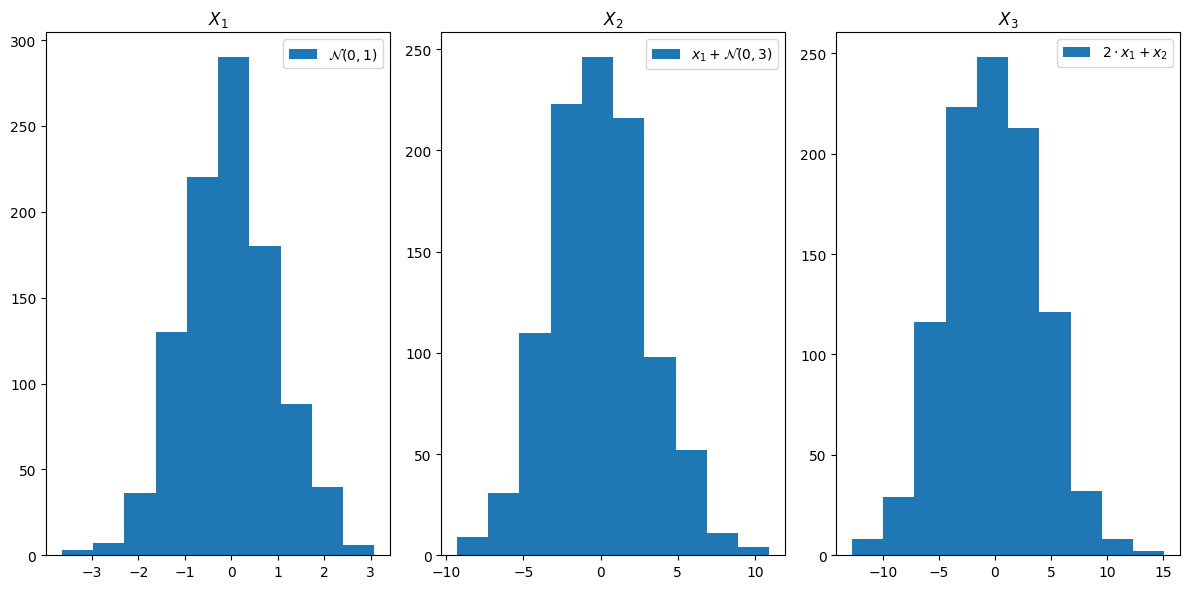

In [20]:
# generating the three random variables
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
# displaying the vars for the sake of it
fig = plt.figure(figsize=(12,6))
ax0 = plt.subplot2grid(shape=(1,3), loc=(0,0), rowspan=1, colspan=1, fig=fig)
ax0.hist(x1, label="$\mathcal{N}(0,1)$")
ax0.set_title("$X_1$")
ax0.legend()
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,1), rowspan=1, colspan=1, fig=fig)
ax1.hist(x2, label="$x_1 + \mathcal{N}(0,3)$")
ax1.set_title("$X_2$")
ax1.legend()
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,2), rowspan=1, colspan=1, fig=fig)
ax2.hist(x3, label="$2\cdot x_1 + x_2$")
ax2.set_title("$X_3$")
ax2.legend()
fig.tight_layout()

In [140]:
# finding the eigenvectors and eigenvalues of the covariance matrix of the dataset
X = np.vstack((x1, x2, x3))
# when calling 'cov', the matrix need to have ONE ROW for each variable.
cov_X = np.cov(X)
l, V = la.eig(cov_X)
print("Eigenvalues:", np.real_if_close(l))
print("Eigenvectors:\n", V)

Eigenvalues: [ 2.54655537e+01 -6.09169793e-16  2.02771180e+00]
Eigenvectors:
 [[-0.11621931 -0.81649658  0.56553197]
 [-0.57641306 -0.40824829 -0.70787097]
 [-0.80885169  0.40824829  0.42319296]]


In [141]:
# finding the eigenvectors and eigenvalues using SVD.
# with SVD, we have that A = U D V^T
U, D, Vt = la.svd(cov_X)
# now, the columns of V are the eigenvectors of AtA while the columns of U are the eigenvectors of AAt
# finally, the values >= 0 of D are the eigenvalues of AtA and AAT respectively.
print(U,'\n')
print(D,'\n')
print(Vt.T,'\n')
# remember from linear algebra: a matrix A and its transpose A.T have the same eigenvalues,
# but their eigenvectors are not necessarily the same.

[[-0.11621931  0.56553197 -0.81649658]
 [-0.57641306 -0.70787097 -0.40824829]
 [-0.80885169  0.42319296  0.40824829]] 

[2.54655537e+01 2.02771180e+00 3.06322368e-16] 

[[-0.11621931  0.56553197  0.81649658]
 [-0.57641306 -0.70787097  0.40824829]
 [-0.80885169  0.42319296 -0.40824829]] 



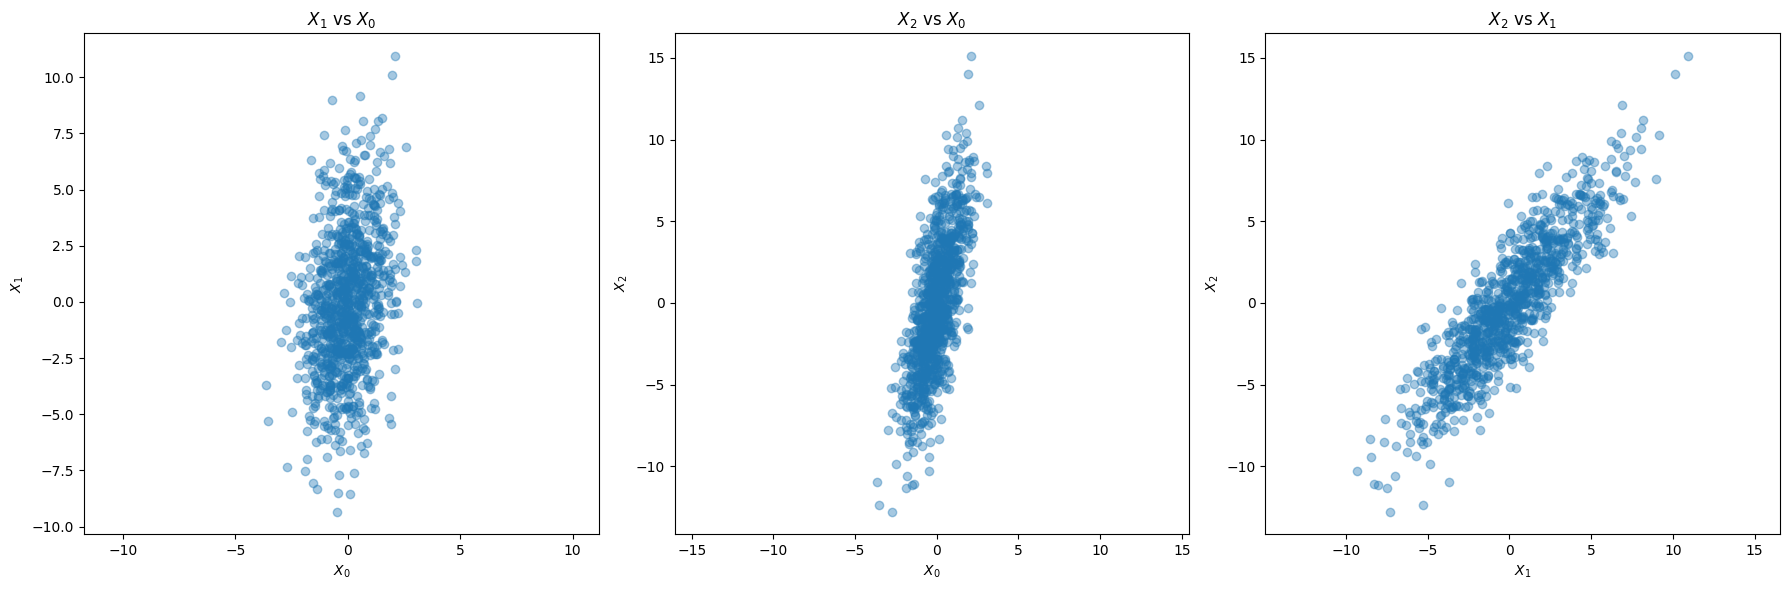

In [389]:
# plotting the original data projections
fig = plt.figure(figsize=(18,6))
ax_0 = plt.subplot2grid((1,3), loc=(0,0), rowspan=1, colspan=1, fig=fig)
ax_0.scatter(X[0,:], X[1,:], marker='o', alpha=0.4)
ax_0.set_title("$X_1$ vs $X_0$")
ax_0.set_xlabel("$X_0$")
ax_0.set_ylabel("$X_1$")
ax_0.axis('equal')

ax_1 = plt.subplot2grid((1,3), loc=(0,1), rowspan=1, colspan=1, fig=fig)
ax_1.scatter(X[0,:], X[2,:], marker='o', alpha=0.4)
ax_1.set_title("$X_2$ vs $X_0$")
ax_1.set_xlabel("$X_0$")
ax_1.set_ylabel("$X_2$")
ax_1.axis('equal')

ax_2 = plt.subplot2grid((1,3), loc=(0,2), rowspan=1, colspan=1, fig=fig)
ax_2.scatter(X[1,:], X[2,:], marker='o', alpha=0.4)
ax_2.set_title("$X_2$ vs $X_1$")
ax_2.set_xlabel("$X_1$")
ax_2.set_ylabel("$X_2$")
ax_2.axis('equal')

fig.tight_layout()

In [403]:
# finding out the percentage of the total dataset's variability that is explained by the principal component
eigenValues, eigenVectors = la.eig(cov_X)
eigenValues = np.real_if_close(eigenValues)
s = 0
for l_idx in np.argsort(eigenValues)[::-1]:
    print(f"Principal component {l_idx}: {eigenValues[l_idx]/np.sum(eigenValues)}")

Principal component 0: 0.9262469640548956
Principal component 2: 0.0737530359451044
Principal component 1: -2.2157054884586065e-17


It makes sense since $X_0$ is the most "fundamental" variable that is used to build $X_2$ and $X_3$. It is expected that these two would exhibit the greatest covariances since $X_2$ depends on $X_1$ while $X_3$ depends on both.

In [429]:
# plotting out the vectors
def vplot(v0, v1, ax):
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


(-10.340842637102945,
 11.954449673895713,
 -14.15986421502555,
 16.506105712251102)

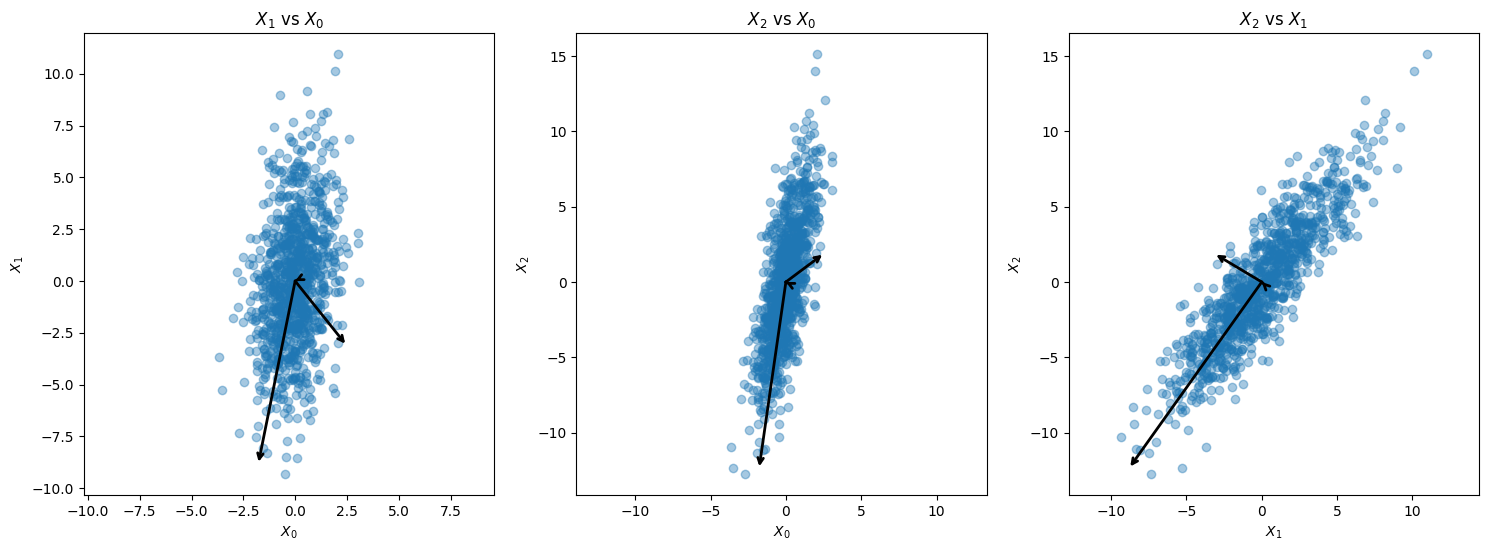

In [443]:
# plotting the original data projections with the 2d-projections of the eigenvectors of the covariance matrix
fig = plt.figure(figsize=(18,6))
ax_0 = plt.subplot2grid((1,3), loc=(0,0), rowspan=1, colspan=1, fig=fig)
ax_0.scatter(X[0,:], X[1,:], marker='o', alpha=0.4)

for length, vector in zip(eigenValues, eigenVectors.T):
    v = vector*3*np.sqrt(np.abs(length))
    vplot([0,0], [v[0],v[1]], ax=ax_0)

ax_0.set_title("$X_1$ vs $X_0$")
ax_0.set_xlabel("$X_0$")
ax_0.set_ylabel("$X_1$")
ax_0.axis('equal')

ax_1 = plt.subplot2grid((1,3), loc=(0,1), rowspan=1, colspan=1, fig=fig)
ax_1.scatter(X[0,:], X[2,:], marker='o', alpha=0.4)
for length, vector in zip(eigenValues, eigenVectors.T):
    v = vector*3*np.sqrt(np.abs(length))
    vplot([0,0], [v[0],v[2]], ax=ax_1)
ax_1.set_title("$X_2$ vs $X_0$")
ax_1.set_xlabel("$X_0$")
ax_1.set_ylabel("$X_2$")
ax_1.axis('equal')

ax_2 = plt.subplot2grid((1,3), loc=(0,2), rowspan=1, colspan=1, fig=fig)
ax_2.scatter(X[1,:], X[2,:], marker='o', alpha=0.4)
for length, vector in zip(eigenValues, eigenVectors.T):
    v = vector*3*np.sqrt(np.abs(length))
    vplot([0,0], [v[1],v[2]], ax=ax_2)
ax_2.set_title("$X_2$ vs $X_1$")
ax_2.set_xlabel("$X_1$")
ax_2.set_ylabel("$X_2$")
ax_2.axis('equal')


(-4.528775097766237,
 4.785288503091546,
 -2.2126344234127943e-15,
 2.4594817308484025e-15)

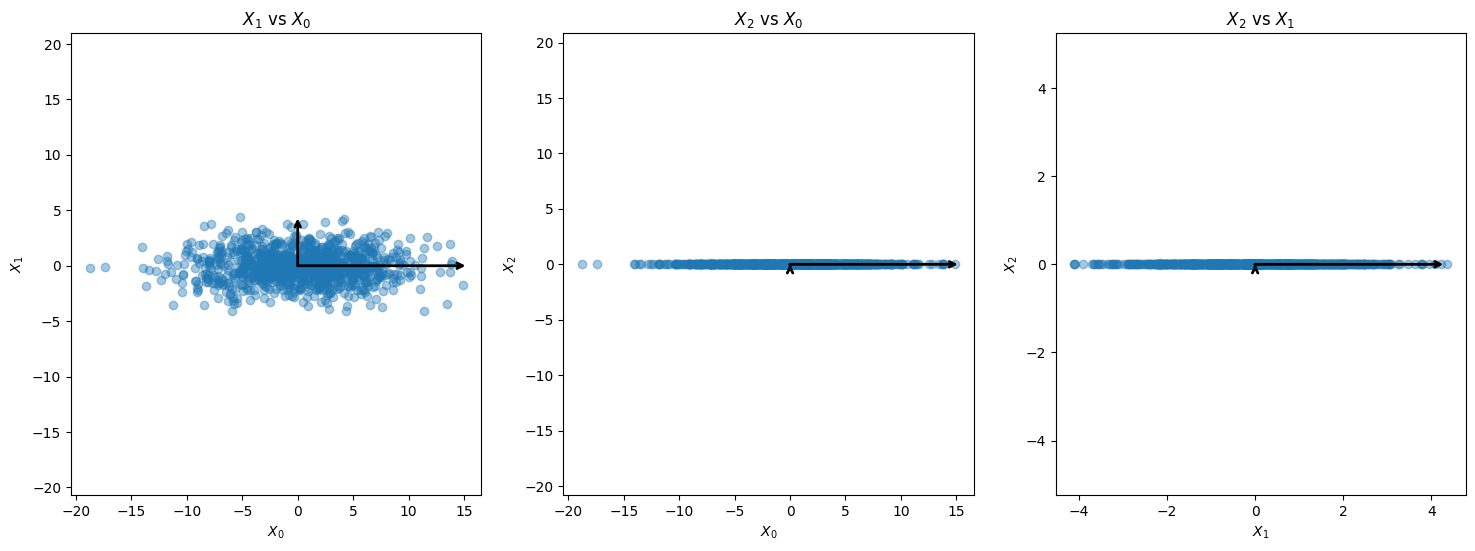

In [474]:
# rotating the data
ordered_eigenValues = []
ordered_eigenVectors = []
for l_idx in np.argsort(eigenValues)[::-1]:
    ordered_eigenValues.append(eigenValues[l_idx])
    ordered_eigenVectors.append(eigenVectors[:, l_idx])
ordered_eigenVectors = np.vstack(ordered_eigenVectors).T

X_rot = np.matmul(ordered_eigenVectors.T, X)
V_rot = np.matmul(ordered_eigenVectors.T, ordered_eigenVectors)

# displaying it
# plotting the original data projections with the 2d-projections of the eigenvectors of the covariance matrix
fig = plt.figure(figsize=(18,6))
ax_0 = plt.subplot2grid((1,3), loc=(0,0), rowspan=1, colspan=1, fig=fig)
ax_0.scatter(X_rot[0,:], X_rot[1,:], marker='o', alpha=0.4)
for length, vector in zip(ordered_eigenValues, V_rot.T):
    v = vector*3*np.sqrt(np.abs(length))
    vplot([0,0], [v[0],v[1]], ax=ax_0)
ax_0.set_title("$X_1$ vs $X_0$")
ax_0.set_xlabel("$X_0$")
ax_0.set_ylabel("$X_1$")
ax_0.axis('equal')

ax_1 = plt.subplot2grid((1,3), loc=(0,1), rowspan=1, colspan=1, fig=fig)
ax_1.scatter(X_rot[0,:], X_rot[2,:], marker='o', alpha=0.4)
for length, vector in zip(ordered_eigenValues, V_rot.T):
    v = vector*3*np.sqrt(np.abs(length))
    vplot([0,0], [v[0],v[2]], ax=ax_1)
ax_1.set_title("$X_2$ vs $X_0$")
ax_1.set_xlabel("$X_0$")
ax_1.set_ylabel("$X_2$")
ax_1.axis('equal')

ax_2 = plt.subplot2grid((1,3), loc=(0,2), rowspan=1, colspan=1, fig=fig)
ax_2.scatter(X_rot[1,:], X_rot[2,:], marker='o', alpha=0.4)
for length, vector in zip(ordered_eigenValues, V_rot.T):
    v = vector*3*np.sqrt(np.abs(length))
    vplot([0,0], [v[1],v[2]], ax=ax_2)
ax_2.set_title("$X_2$ vs $X_1$")
ax_2.set_xlabel("$X_1$")
ax_2.set_ylabel("$X_2$")
ax_2.axis('equal')

In [504]:
# reducing now to two components only
kept_eigenValues = []
kept_eigenVectors = []
i = 0
for l_idx in np.argsort(eigenValues)[::-1]:
    kept_eigenValues.append(eigenValues[l_idx])
    kept_eigenVectors.append(eigenVectors[:, l_idx])
    if i==1:
        break;
    else:
        i += 1
# building the transformation matrix
V = np.vstack(kept_eigenVectors).T
# rotating the data
X_pca = np.matmul(V.T, X)
V_pca = np.matmul(V.T, V)

(-20.45459810449628, 16.552369922242015, -4.528775097766237, 4.785288503091546)

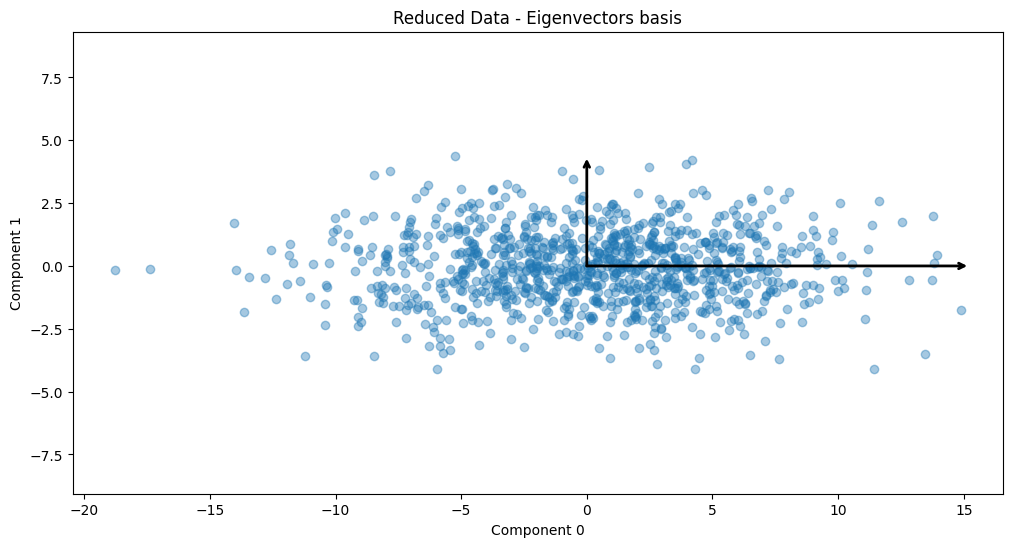

In [505]:
# plotting the rotated data
fig = plt.figure(figsize=(12,6))
ax_0 = plt.subplot2grid((1,1), loc=(0,0), rowspan=1, colspan=1, fig=fig)
ax_0.scatter(X_pca[0,:], X_pca[1,:], marker='o', alpha=0.4)
for length, vector in zip(kept_eigenValues, V_pca.T):
    v = vector*3*np.sqrt(np.abs(length))
    vplot([0,0], [v[0],v[1]], ax=ax_0)
ax_0.set_title("Reduced Data - Eigenvectors basis")
ax_0.set_xlabel("Component 0")
ax_0.set_ylabel("Component 1")
ax_0.axis('equal')

(-10.34084263710294,
 11.954449673895706,
 -14.15986421502555,
 16.506105712251102)

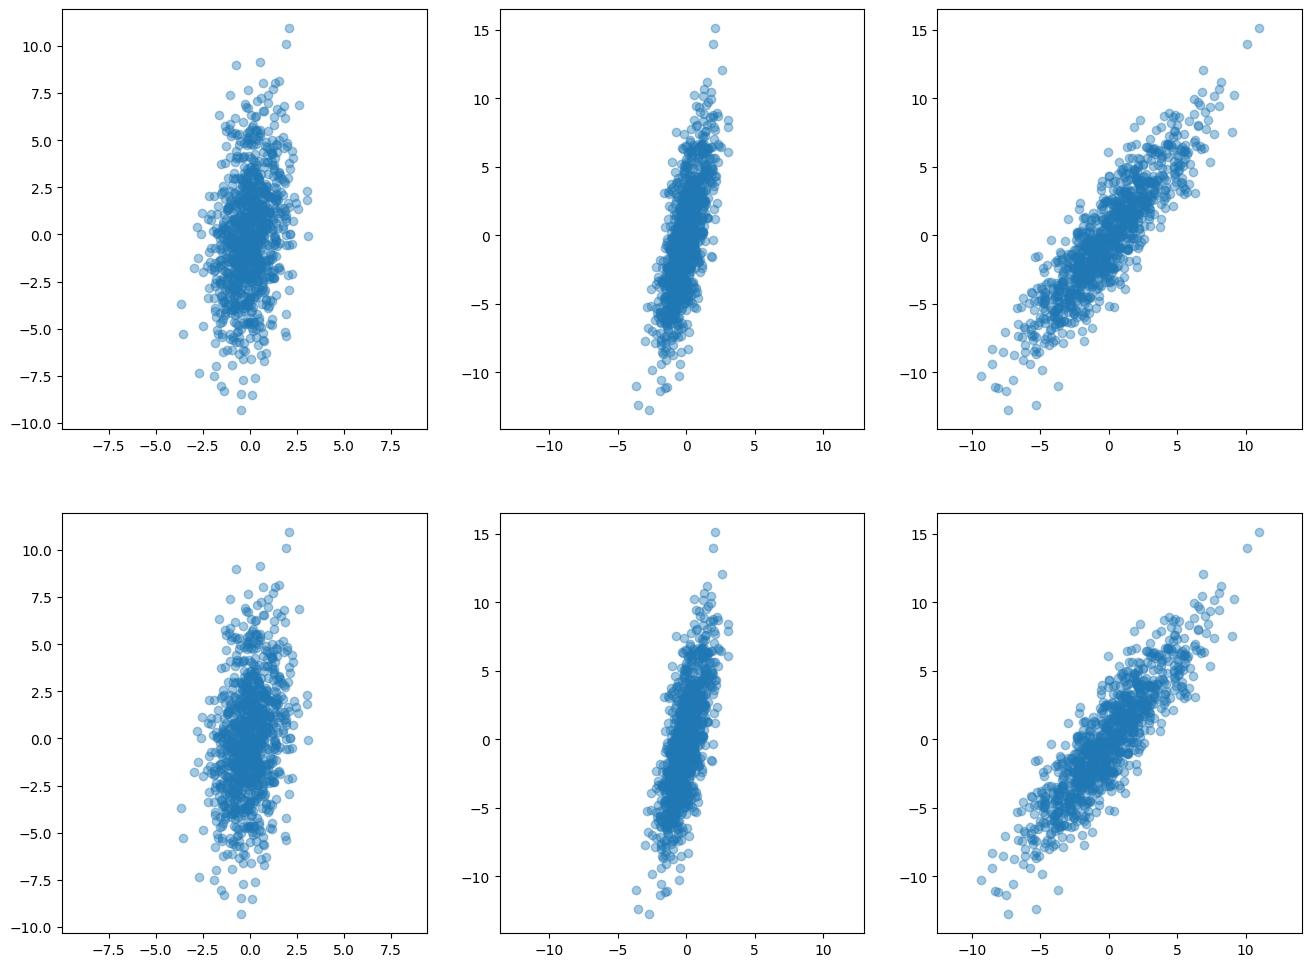

In [511]:
# transforming back
Xp = np.matmul(V, X_pca)
fig = plt.figure(figsize=(16,12))
# plotting (0,1) before and after
ax_0 = plt.subplot2grid((2,3), loc=(0,0), rowspan=1, colspan=1, fig=fig)
ax_0.scatter(X[0,:], X[1,:], marker='o', alpha=0.4)
ax_0.axis('equal')
ax_3 = plt.subplot2grid((2,3), loc=(1,0), rowspan=1, colspan=1, fig=fig)
ax_3.scatter(Xp[0,:], Xp[1,:], marker='o', alpha=0.4)
ax_3.axis('equal')

# plotting (0,2) before and after
ax_1 = plt.subplot2grid((2,3), loc=(0,1), rowspan=1, colspan=1, fig=fig)
ax_1.scatter(X[0,:], X[2,:], marker='o', alpha=0.4)
ax_1.axis('equal')
ax_4 = plt.subplot2grid((2,3), loc=(1,1), rowspan=1, colspan=1, fig=fig)
ax_4.scatter(Xp[0,:], Xp[2,:], marker='o', alpha=0.4)
ax_4.axis('equal')

# plotting (0,3)
ax_2 = plt.subplot2grid((2,3), loc=(0,2), rowspan=1, colspan=1, fig=fig)
ax_2.scatter(X[1,:], X[2,:], marker='o', alpha=0.4)
ax_2.axis('equal')
ax_5 = plt.subplot2grid((2,3), loc=(1,2), rowspan=1, colspan=1, fig=fig)
ax_5.scatter(Xp[1,:], Xp[2,:], marker='o', alpha=0.4)
ax_5.axis('equal')

In [658]:
def my_PCA(X, n_components=None):
    # covariance matrix of X requires X to be shaped so that each line contains a different feature
    if n_components==None:
        n_components = X.shape[0]
    cov_X = np.cov(X)
    # eigenvalues and eigenvectors of the covariance matrix
    ls, Vs = la.eig(cov_X)
    ls = np.real_if_close(ls)
    eigenValues = []
    eigenVectors = []
    i = 0
    for l_idx in np.argsort(ls)[::-1]:
        eigenValues.append(ls[l_idx])
        eigenVectors.append(Vs[:, l_idx])
        if i==(n_components-1):
            break;
        else:
            i += 1
    # printing an initial report
    print(f"my_PCA: number of components in the dataset is {X.shape[0]}")
    print(f"my_PCA: number of desired components is {n_components}")
    vtot = 0
    for l_idx in range(0,n_components,1):
        print(f"my_PCA: eigenvalue {eigenValues[l_idx]} -> {np.round((eigenValues[l_idx]/np.sum(ls)),4)*100}")
        vtot += eigenValues[l_idx]
    print(f"my_PCA: total variance {np.round((vtot/np.sum(ls))*100,4)}%")
    # now the eigenvalues and eigenvectors have been ordered
    V_matrix = np.vstack(eigenVectors).T
    X_pca = np.matmul(V_matrix.T, X)
    # transforming back
    X_new = np.matmul(V_matrix, X_pca)
    # returning the stuff
    return [(eigenValues, eigenVectors), X_pca, X_new]
    

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

my_PCA: number of components in the dataset is 13
my_PCA: number of desired components is 2
my_PCA: eigenvalue 25.52698162798493 -> 92.61
my_PCA: eigenvalue 2.029806557168139 -> 7.359999999999999


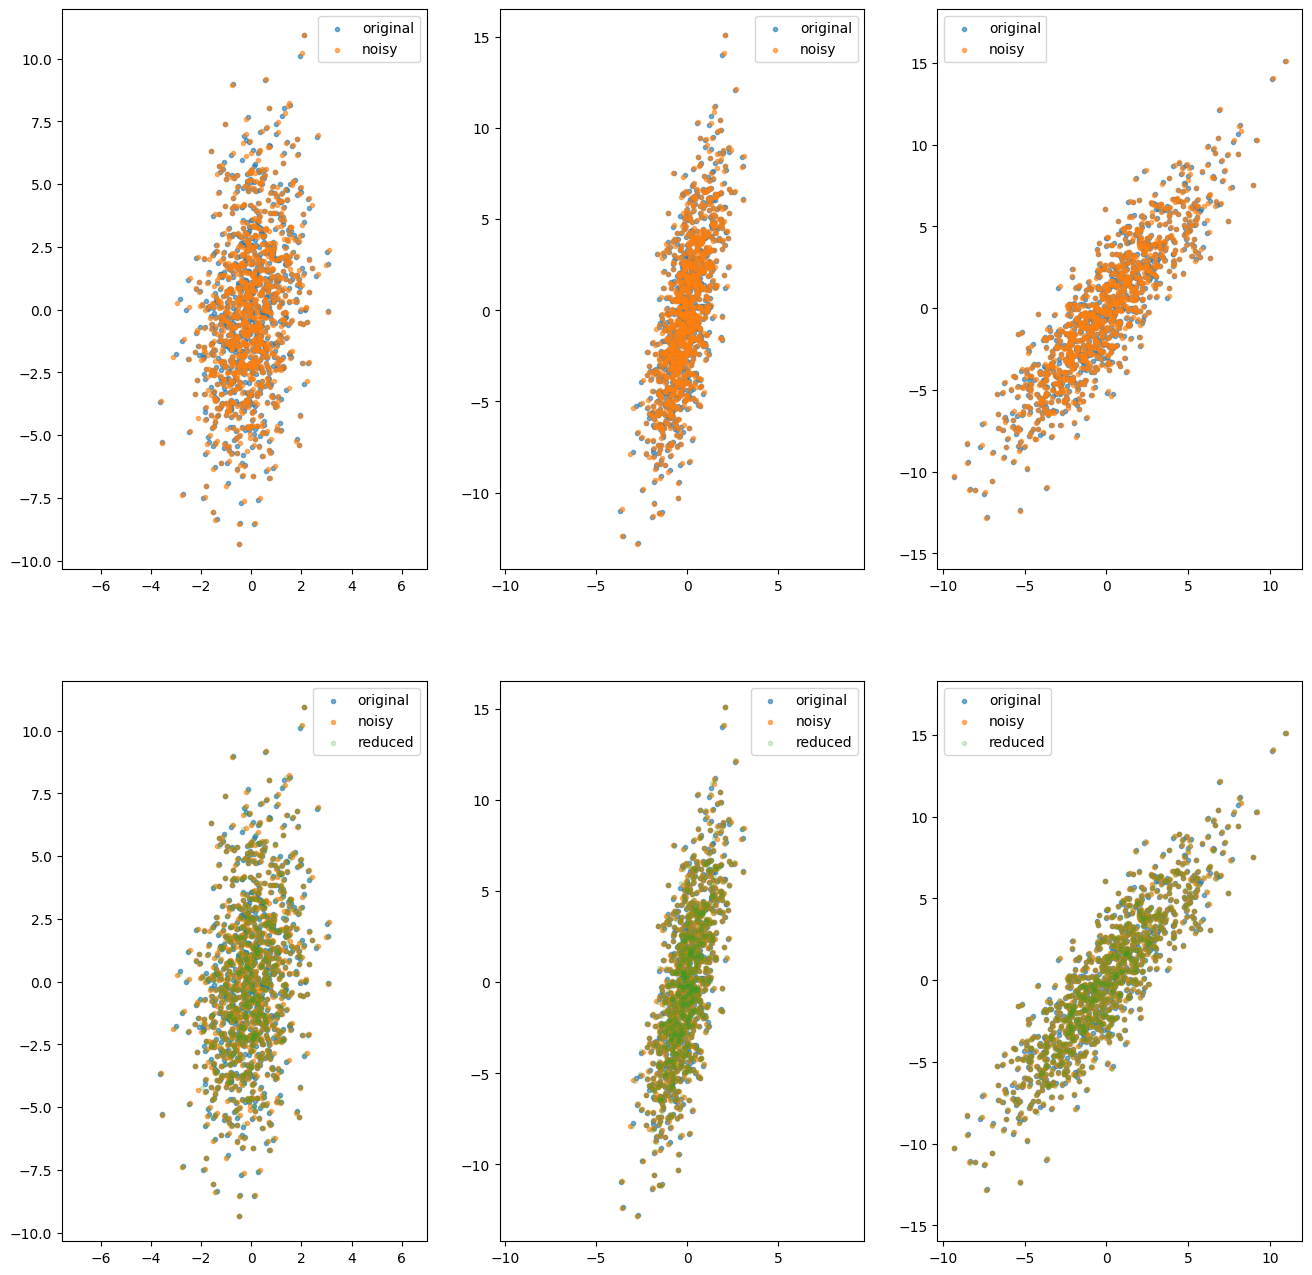

In [591]:
# generating 10 variables for the noise
noise_vars = []
std_devs = np.random.random(10)/20

# generating the noises
noises = []
for i in range(0,10,1):
    noises.append(std_devs[i]*np.random.randn(N))
noises = np.array(noises)

# adding noises to xs
x1n = x1 + np.sum(noises, axis=0)
x2n = x2 + np.sum(noises, axis=0)
x3n = x3 + np.sum(noises, axis=0)

# generating the full dataset
Xn = None
for i in range(0,11,1):
    if i==0:
        Xn = np.vstack([x1n, x2n, x3n])
    else:
        Xn = np.vstack([Xn, noises[i-1]])

# repeat PCA procedure
lV, X_noise_pca, X_noise_new = my_PCA(Xn, n_components=2)

# printing out to see
fig = plt.figure(figsize=(16,16))
ax_0 = plt.subplot2grid((2,3), loc=(0,0), fig=fig)
ax_0.scatter(X[0, :], X[1, :], marker='.', label="original", alpha=0.6)
ax_0.scatter(Xn[0, :], Xn[1, :], marker='.', alpha=0.6, label="noisy")
ax_0.axis('equal')
ax_0.legend()
ax_3 = plt.subplot2grid((2,3), loc=(1,0), fig=fig)
ax_3.scatter(X[0, :], X[1, :], marker='.', label='original', alpha=0.6)
ax_3.scatter(Xn[0, :], Xn[1, :], marker='.', label='noisy', alpha=0.6)
ax_3.scatter(X_noise_new[0, :], X_noise_new[1, :], marker='.', label='reduced', alpha=0.2)
ax_3.axis('equal')
ax_3.legend()
ax_1 = plt.subplot2grid((2,3), loc=(0,1), fig=fig)
ax_1.scatter(X[0, :], X[2, :], marker='.', label="original", alpha=0.6)
ax_1.scatter(Xn[0, :], Xn[2, :], marker='.', alpha=0.6, label="noisy")
ax_1.axis('equal')
ax_1.legend()
ax_4 = plt.subplot2grid((2,3), loc=(1,1), fig=fig)
ax_4.scatter(X[0, :], X[2, :], marker='.', label='original', alpha=0.6)
ax_4.scatter(Xn[0, :], Xn[2, :], marker='.', label='noisy', alpha=0.6)
ax_4.scatter(X_noise_new[0, :], X_noise_new[2, :], marker='.', label='reduced', alpha=0.2)
ax_4.axis('equal')
ax_4.legend()
ax_2 = plt.subplot2grid((2,3), loc=(0,2), fig=fig)
ax_2.scatter(X[1, :], X[2, :], marker='.', label="original", alpha=0.6)
ax_2.scatter(Xn[1, :], Xn[2, :], marker='.', alpha=0.6, label="noisy")
ax_2.axis('equal')
ax_2.legend()
ax_5 = plt.subplot2grid((2,3), loc=(1,2), fig=fig)
ax_5.scatter(X[1, :], X[2, :], marker='.', label='original', alpha=0.6)
ax_5.scatter(Xn[1, :], Xn[2, :], marker='.', label='noisy', alpha=0.6)
ax_5.scatter(X_noise_new[1, :], X_noise_new[2, :], marker='.', label='reduced', alpha=0.2)
ax_5.axis('equal')
ax_5.legend()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [881]:
# simulating datapoints for the oscillating spring
def rot_matrix(phi, theta):
    return np.array([
        [np.cos(phi), -1.0*np.sin(phi), 0],
        [np.cos(theta)*np.sin(phi), np.cos(theta)*np.cos(phi), -1.0*np.sin(theta)],
        [np.sin(theta)*np.sin(phi), np.sin(theta)*np.cos(phi), np.cos(theta)]
    ])

# x(t) = A*sin(omega*t)
# y(t) = random noise
N_steps = 1000
T = 2.0*np.pi/10
A = 1
# simulating with some noise along y
t = np.linspace(0, 2*np.pi, N_steps)
x_0 = A*np.sin(2*np.pi/T * t)
y_0 = np.random.randn(N_steps)*(A/50)
x = np.vstack((x_0, y_0, np.zeros(N_steps))).T

# number of cameras
N_cameras = 4
# now, for each camera i need to generate the angular positions
camera_phi = np.random.random(N_cameras)*2.0*np.pi
camera_theta = np.random.random(N_cameras)*np.pi
# now we can rotate the dataset in each camera and for each rotation i need to compute x_phitheta, and y_phitheta
X_spring = None
for nc in range(N_cameras):
    rotmat = rot_matrix(camera_phi[nc], camera_theta[nc])
    # now to multiply the original vector
    rot_x = np.matmul(rotmat.T, x.T)
    # i have now the rotated things, let's see
    if nc==0:
        XY_plane = np.sqrt(np.matmul(x, x.T).diagonal())
        X_spring = np.vstack([t, x.T, XY_plane])
    XY_plane = np.sqrt(np.matmul(rot_x.T, rot_x).diagonal())
    X_spring = np.vstack([X_spring, rot_x, XY_plane])
# now we have the full dataset with the spring oscillations and the recordings of the various cameras
lV, X_pca, X_new = my_PCA(X_spring, n_components=3)

my_PCA: number of components in the dataset is 21
my_PCA: number of desired components is 3
my_PCA: eigenvalue 3.3579920938348593 -> 53.510000000000005
my_PCA: eigenvalue 2.4417628840606747 -> 38.91
my_PCA: eigenvalue 0.4735350521150829 -> 7.55
my_PCA: total variance 99.9677%


(-0.31416404124599595,
 6.597349963995476,
 -0.0445510320299639,
 1.0501809404509832)

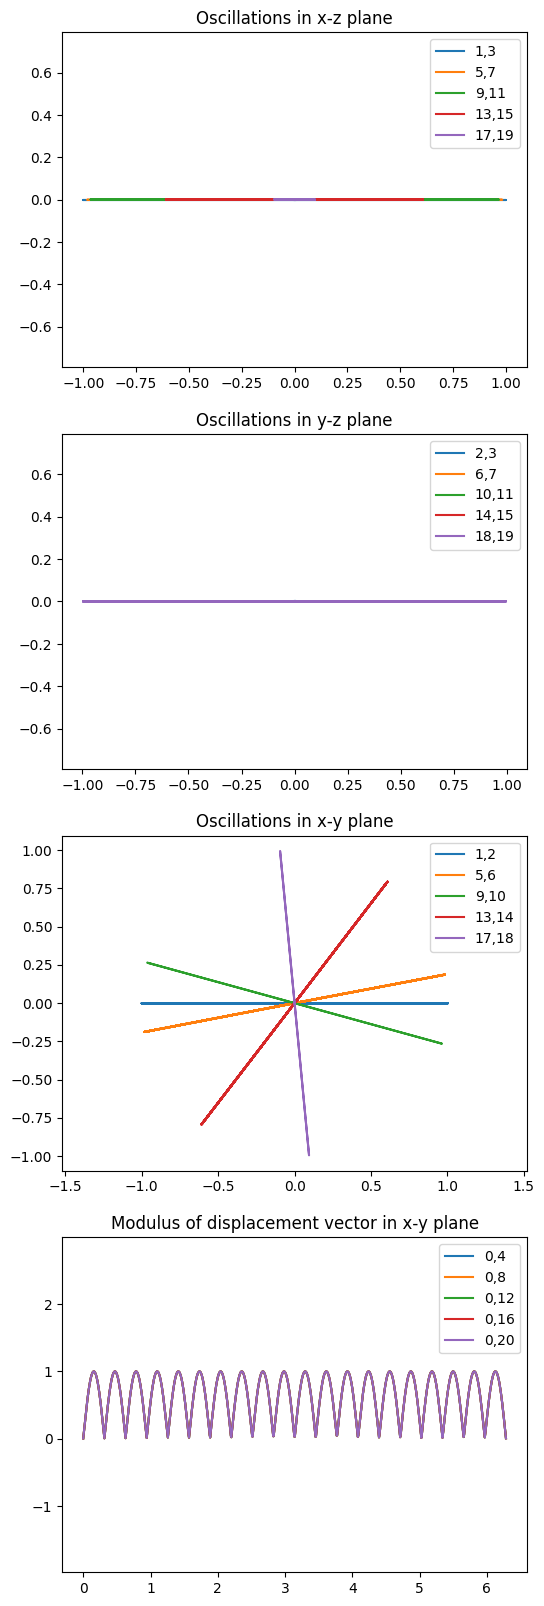

In [882]:
fig = plt.figure(figsize=(6,20))
ax0 = plt.subplot2grid((4,1), loc=(0,0), fig=fig)
for i in range(3,X_new.shape[0],4):
    ax0.plot(X_new[i-2, :], X_new[i, :], label=str(i-2)+","+str(i))
ax0.set_title("Oscillations in x-z plane")
ax0.legend()
ax0.axis('equal')

ax1 = plt.subplot2grid((4,1), loc=(1,0), fig=fig)
for i in range(3,X_new.shape[0],4):
    ax1.plot(X_new[i-1, :], X_new[i, :], label=str(i-1)+","+str(i))
ax1.set_title("Oscillations in y-z plane")
ax1.legend()
ax1.axis('equal')

ax3 = plt.subplot2grid((4,1), loc=(2,0), fig=fig)
for i in range(2,X_new.shape[0],4):
    ax3.plot(X_new[i-1, :], X_new[i, :], label=str(i-1)+","+str(i))
ax3.set_title("Oscillations in x-y plane")
ax3.legend()
ax3.axis('equal')

ax4 = plt.subplot2grid((4,1), loc=(3,0), fig=fig)
for i in range(4,X_new.shape[0],4):
    ax4.plot(X_new[0, :], X_new[i, :], label="0,"+str(i))
ax4.set_title("Modulus of displacement vector in x-y plane")
ax4.legend()
ax4.axis('equal')



4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [6]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2024-01-20 20:32:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: non specificato
Salvataggio in: «/Users/pietro/data/magic04.data»

magic04.data            [     <=>            ]   1,41M   838KB/s    in 1,7s    

2024-01-20 20:32:06 (838 KB/s) - «/Users/pietro/data/magic04.data» salvato [1477391]

--2024-01-20 20:32:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: non specificato
Salvataggio in: «/Users/pietro/data/magic04.names»

magic04.names           [ <=>  